In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()

We will now import a dataset from the UCI Machine Learning repository. The data is deals with bike rentals where people can pick up bikes from one location and drop them off at any other designated location, as convenient to them. 

In [2]:
bike_data=pd.read_csv('datasets/day.csv',
                     sep=r'\s*,\s*', engine='python')

In [3]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


The data has the following fields
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [4]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


We want to study this data and predict the trends of shared bikes, and maybe provide a guide to tourists about when bikes would be easily available for rent. This is clearly a machine learning problem where we will first use a training dataset, figure out relationships and then apply the same algorithms on new data.

Before we move on to our machine learning model, let us first quickly explore the dataset to see if any relationship exists using Seaborn. 

## First, let's get an idea of the demand for bike sharing. 
From the data description we just saw above, the average number of bikes rented was around 4500 each day.
Plotting a histogram with the number of bikes rented,

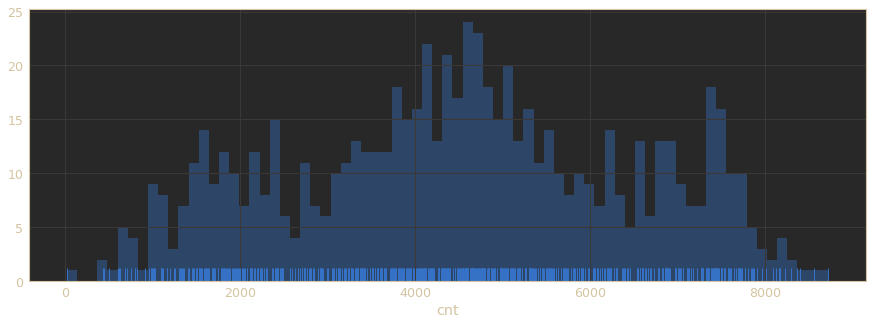

In [5]:
f, ax=plt.subplots(figsize=(15,5))

sns.distplot(bike_data['cnt'],bins=75, kde=False, rug=True);

We see that the demand for bikes is mostly between the range of 4000-5000, with a peak of about 4600 from the graph. This matches with the average we observed. There are some days with demand as less as about a 100, while the max demand on any given day is about 8400.

## Let us try to see how the number of bikes rented varies with every day of the year. 
Our dataset has about 2 years worth of data. Lets plot a jointplot of the instant versus the bike count. The instant is a measure of

/home/user/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


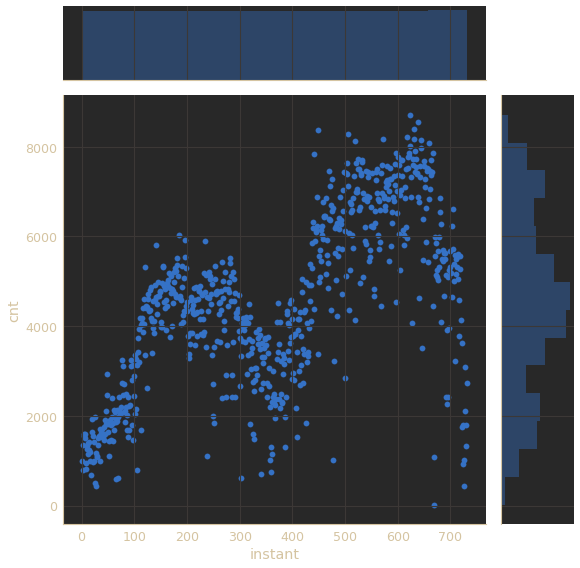

In [6]:
sns.jointplot(x='instant', y='cnt', data=bike_data, size=8)

We see that the demand for bikes starts with a small number, increases at about instant 200 that corresponds to mid year,and drops down towards the end of the year. The same pattern follow in the second year too, with a max at instant 600 range corresponding to mid second year. There is an extra peak in the second half of the second year.
We can see that there is maximum demand for rental bikes during mid year and least during the start and end of the year. Let us confirm this by plotting the demand for the different months.


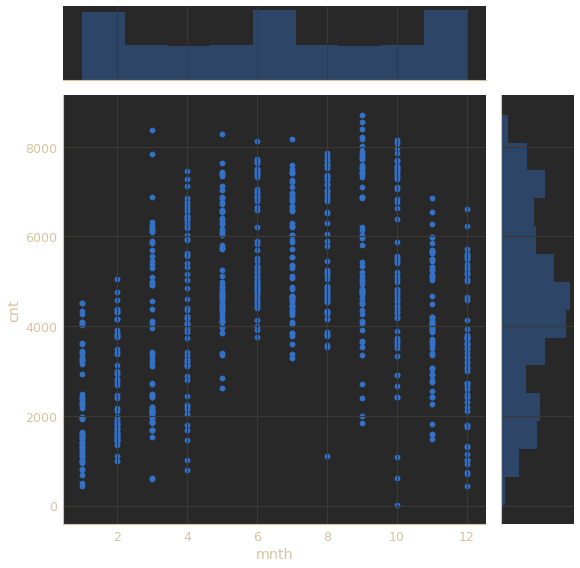

In [12]:
sns.jointplot(x='mnth', y='cnt', data=bike_data, size=8)

Our analysis is perfectly correct. The maximum demand is in the months of 6-8, which is mid year, i.e. June-July. The peak seen in the second half of the second year falls in the 9th month, as is clear from the above plot. 

## Let us now try to see how the demand varies across the week.

/home/user/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


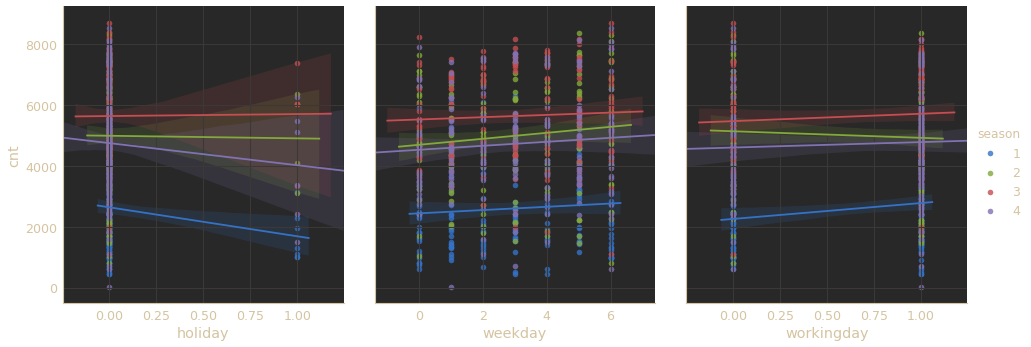

In [8]:
sns.pairplot(bike_data, 
             size=5, aspect=0.9, 
             x_vars=["holiday","weekday","workingday"],
             y_vars=["cnt"],
             kind="reg",
             hue="season")

The above are three graphs of the bike count plotted versus whether the day is a holiday, weekday or working day respectively.

* From the second plot, the number of bikes hired seem to be almost the same on all days of the week. 
* From the third plot, days weekdays seem to have more requests than weekends/holidays(workingday=1).
* The first plot clearly shows that the demand for bikes on rent is most during days that are not holidays. 
* Comparing the above two points, it looks like the demand on weekends is also similar, but slightly lesser than other weekdays.

From the above analysis, the dataset seems to point to the bikes rented by the working class to travel to and from the workplace, or subway stations. This explains why there is more demand during weekdays than on holidays.

** What is very interesting to note here is that while we would have expected the number of bikes rented to be dependent on the day of the week, the regression line fits show that the demand is more dependent on the season of the year than on the day of the week. **

* The highest demand is in season 3, fall
* Next comes season 2, summer
* Followed by season 4, winter
* And the least demand is in season 1, spring


*To confirm our above observation, lets plot the count versus the season of the year*

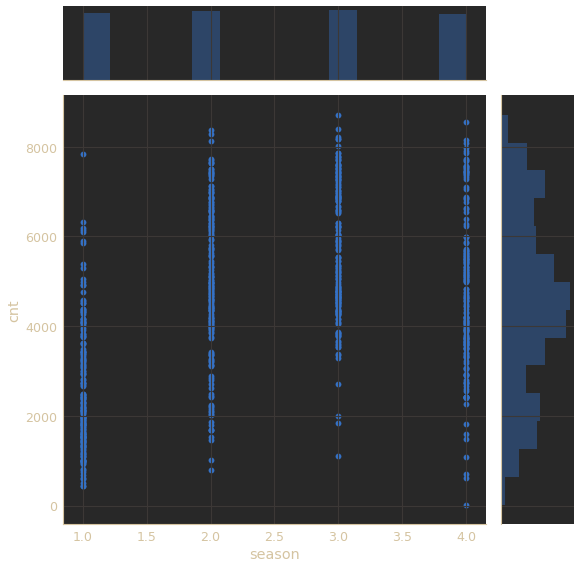

In [9]:
sns.jointplot(x='season', y='cnt', data=bike_data, size=8)

We see that this perfectly matches our analysis from the previous graph.

## Does the weather condition also play a role in the number of bike rentals?

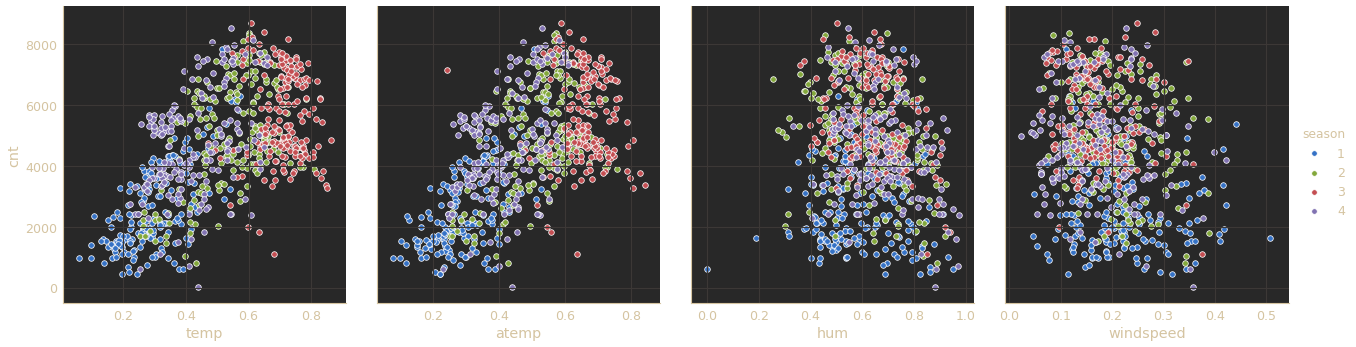

In [10]:
sns.pairplot(bike_data, 
             size=5, aspect=0.9, 
             x_vars=["temp","atemp","hum","windspeed"],
             y_vars=["cnt"],
             hue="season")

The first two plots are the number of bike rentals versus the temperature and the 'feels-like' temperature. These seem similar and we can say that there is not much change in rental pattern. More the temperature of the day, higher are the number of people choosing to hire a bike, there is a significant number of bike rentals even when temperatures are low.

When the days are very dry, there are hardly any bike rentals. When the humidity crosses a limit of 0.4, bikes are in demand.

The windspeed also influences bike rentals to an extent. Windspeeds of 0.1 to 0.3 have a high demand for bike rentals. As the speed becomes higher, it probably gets too cold to ride and the number of rentals reduces.

